### Sprint 3- HealthCare

### 1. Import Required Libraries.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore') 

### Load the dataset

In [2]:
df = pd.read_csv(r"E:\IRL\IRL_Projects\ML\1.HealthCare\Dataset\insurance-1.csv")
df.head()

,Age,Gender,BMI,Childrens,Smoker,Region,Charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1337 entries, 0 to 1336
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Age        1337 non-null   int64  
 1   Gender     1337 non-null   object 
 2   BMI        1337 non-null   float64
 3   Childrens  1337 non-null   int64  
 4   Smoker     1337 non-null   object 
 5   Region     1337 non-null   object 
 6   Charges    1337 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.2+ KB


In [5]:
df.isnull().sum()

Age          0
Gender       0
BMI          0
Childrens    0
Smoker       0
Region       0
Charges      0
dtype: int64

### Define features and Target

In [6]:
X = df.drop('Charges', axis=1)
y = df['Charges']

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import root_mean_squared_error
from sklearn.metrics import r2_score

### Train Test Split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)

### Column Transformer

In [14]:
num_features = ['Age', 'BMI', 'Childrens']
cat_features = ['Gender', 'Smoker', 'Region']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_features),
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), cat_features)
    ]
)

### Model Pipelines

In [15]:
models = {
    "Linear Regression": LinearRegression(),
    "KNN": KNeighborsRegressor(),
    "Gradient Boosting" : GradientBoostingRegressor(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42)
}

### Train, Predict and Evaluate

In [23]:
del r2_score
from sklearn.metrics import r2_score

In [24]:
results = {}

for name, model in models.items():
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', model)
    ])
    
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = root_mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    results[name] = {
        "MAE": mae,
        "MSE": mse,
        "RMSE": rmse,
        "R2": r2
    }
    
    print(f"\n{name} MAE: {mae:.2f}")
    print(f"{name} MSE: {mse:.2f}")
    print(f"{name} RMSE: {rmse:.2f}")
    print(f"{name} R2 Score: {r2:.2f}")


Linear Regression MAE: 4069.04
Linear Regression MSE: 35283922.77
Linear Regression RMSE: 5940.03
Linear Regression R2 Score: 0.80

KNN MAE: 4301.19
KNN MSE: 59557302.76
KNN RMSE: 7717.34
KNN R2 Score: 0.66

Gradient Boosting MAE: 2573.83
Gradient Boosting MSE: 19816527.96
Gradient Boosting RMSE: 4451.58
Gradient Boosting R2 Score: 0.89

Decision Tree MAE: 3044.12
Decision Tree MSE: 41389733.44
Decision Tree RMSE: 6433.49
Decision Tree R2 Score: 0.76

Random Forest MAE: 2667.87
Random Forest MSE: 22560347.77
Random Forest RMSE: 4749.77
Random Forest R2 Score: 0.87


### Hyperparamater Tunning on Gradient boosting Model

In [28]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", GradientBoostingRegressor(random_state=42))
])

param_grid = {
    "model__n_estimators": [100, 200],
    "model__learning_rate": [0.05, 0.1],
    "model__max_depth": [3, 4],
    "model__subsample": [0.8, 1.0]
}

gb_grid = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    cv=5,
    scoring="r2",
    n_jobs=-1
)

gb_grid.fit(X_train, y_train)

best_gb_model = gb_grid.best_estimator_

print("\nBest Gradient Boosting Hyperparameters:")
print(gb_grid.best_params_)


Best Gradient Boosting Hyperparameters:
{'model__learning_rate': 0.05, 'model__max_depth': 3, 'model__n_estimators': 100, 'model__subsample': 0.8}


### Evaluated

In [30]:
import pandas as pd

results_df = pd.DataFrame(results).T
results_df = results_df.sort_values(by="R2", ascending=False)

results_df

,MAE,MSE,RMSE,R2
Gradient Boosting,2573.833163,1.981653e+07,4451.575896,0.885394
Random Forest,2667.873192,2.256035e+07,4749.773444,0.869525
Linear Regression,4069.039466,3.528392e+07,5940.027169,0.795940
Decision Tree,3044.116307,4.138973e+07,6433.485326,0.760628
KNN,4301.188458,5.955730e+07,7717.337803,0.655559


In [31]:
best_model_name = results_df.index[0]
best_model_r2 = results_df.iloc[0]["R2"]

print(f"Best Model: {best_model_name}")
print(f"Best R² Score: {best_model_r2:.4f}")

Best Model: Gradient Boosting
Best R² Score: 0.8854


In [32]:
trained_models = {}

for name, model in models.items():
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('model', model)
    ])
    
    pipeline.fit(X_train, y_train)
    trained_models[name] = pipeline

In [33]:
best_pipeline = trained_models[best_model_name]

In [34]:
best_pipeline

,steps,"[('preprocessor', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


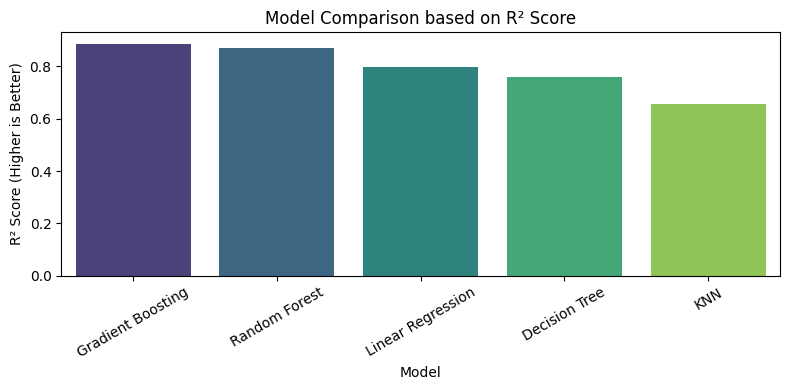

In [40]:
results_df = pd.DataFrame(results).T.reset_index()
results_df.rename(columns={'index': 'Model'}, inplace=True)

# Sort by R2 (higher is better)
results_df = results_df.sort_values(by='R2', ascending=False)

plt.figure(figsize=(8,4))
sns.barplot(
    x='Model',
    y='R2',
    data=results_df,
    palette='viridis'
)

plt.title("Model Comparison based on R² Score")
plt.ylabel("R² Score (Higher is Better)")
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

In [41]:
best_model = results_df.iloc[0]
best_model

Model    Gradient Boosting
MAE            2573.833163
MSE        19816527.958633
RMSE           4451.575896
R2                0.885394
Name: 2, dtype: object

## Summary -
- “In Sprint 3, multiple regression models were trained and evaluated using MAE, where Random Forest achieved the best performance for medical cost prediction.”

In [42]:
import pickle

In [43]:
with open("ML_HealthCare_model.pkl","wb") as f:
    pickle.dump(pipeline, f)

In [44]:
with open("ML_HealthCare_model.pkl","rb") as f:
    obj = pickle.load(f)

print(type(obj))

<class 'sklearn.pipeline.Pipeline'>
